# Predicting the presence of heart disease in patients using Logistic Regression (machine learning).
Notebook for C964 Project, this will be used to build out the machine learning algorithm with the goal of accurately
predicting if someone has heart disease based on health parameters.

## 1. Problem Definition -
   Given medical parameters in regards to a patient, is it possible for us to predict the presense of heart disease?

## 2. Data -
   The data is originally from the UCI Machine Learning Repository, although I will be using the version available on Kaggle
   https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

## 3. Evaluation -
   As heart failure is a very serious condition, it is important to be able to predict to a high degree of accuracy. The goal for our evaluation criteria will be to reach an accuracy of 90% in regards to predicting the presence of heart failure.

# Preparing the tools
We will use pandas, matplotlib, seaborn and numpy in order to manipulate and analyze the data.

In [ ]:
# Import tools
%pip install seaborn

import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as pyplot
import seaborn as seaborn

# makes plots appear inside notebook
%matplotlib inline

# Scikit Learn models
from sklearn.linear_model import LogisticRegression

# Model eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [ ]:
!gdown "1CSgwkoou531YFGZCVlrbzaGyHGxYVz6U&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1CSgwkoou531YFGZCVlrbzaGyHGxYVz6U&confirm=t
To: /content/heart.csv
100% 35.9k/35.9k [00:00<00:00, 34.6MB/s]


In [ ]:
# Load Our Data

In [ ]:
dataframe = pandas.read_csv("heart.csv")
dataframe.shape # (rows, columns)

(918, 12)

## Data Exploration (exploratory data analysis/EDA)
Make sure there's no overfitting or underfitting. Explore the data and learn more about it.

In [ ]:
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataframe.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
# Find out how many of each class is present
dataframe["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

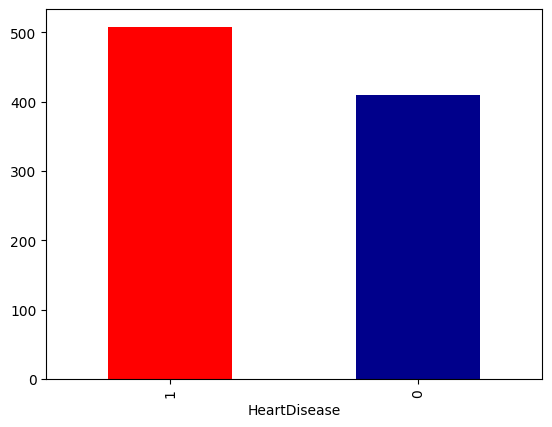

In [ ]:
dataframe["HeartDisease"].value_counts().plot(kind="bar", color=["red", "darkblue"]);

In [ ]:
dataframe.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]>

In [ ]:
# Any values missing? (NO)
dataframe.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
dataframe.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
## Heart Failure Occurence based on Sex

In [ ]:
dataframe.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [ ]:
# Compare HeartDisease column with Sex
pandas.crosstab(dataframe.HeartDisease, dataframe.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

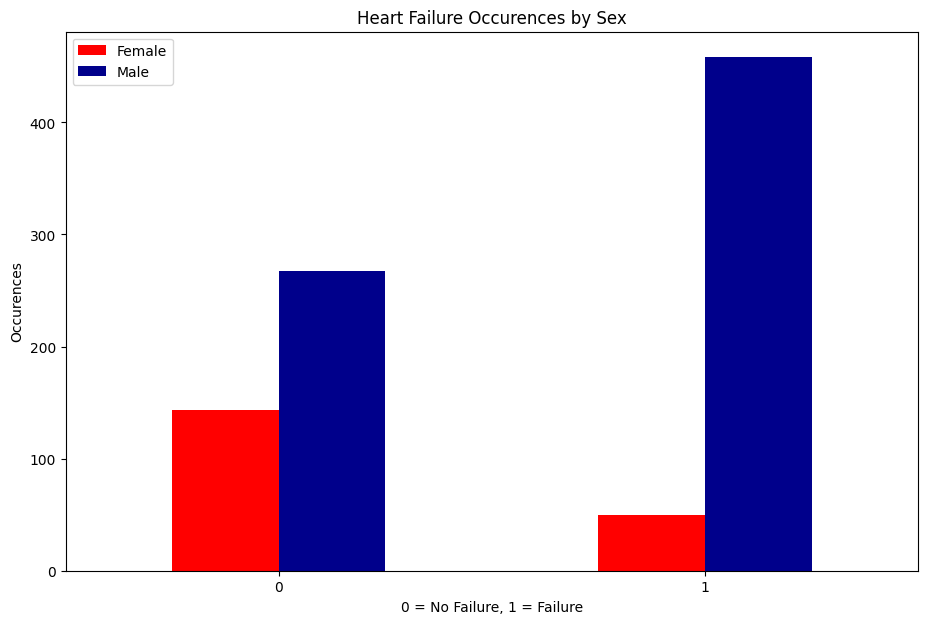

In [ ]:
# For Females, 50 out of 193 have heart failure. Roughly 26% chance for women to have heart disease based on our dataset.
# For Males, 458 out of 725 have heart failure. Roughly 63% chancee for men to have heart disease based on our dataset.
# For any given person, ~45% chance of heart failure.
pandas.crosstab(dataframe.HeartDisease, dataframe.Sex).plot(kind="bar", figsize=(11,7), color=["red", "darkblue"])

pyplot.title("Heart Failure Occurences by Sex")
pyplot.xlabel("0 = No Failure, 1 = Failure")
pyplot.ylabel("Occurences")
pyplot.legend(["Female", "Male"]);
pyplot.xticks(rotation=0)

## Age vs Maximum Heart Disease for Heart Failure

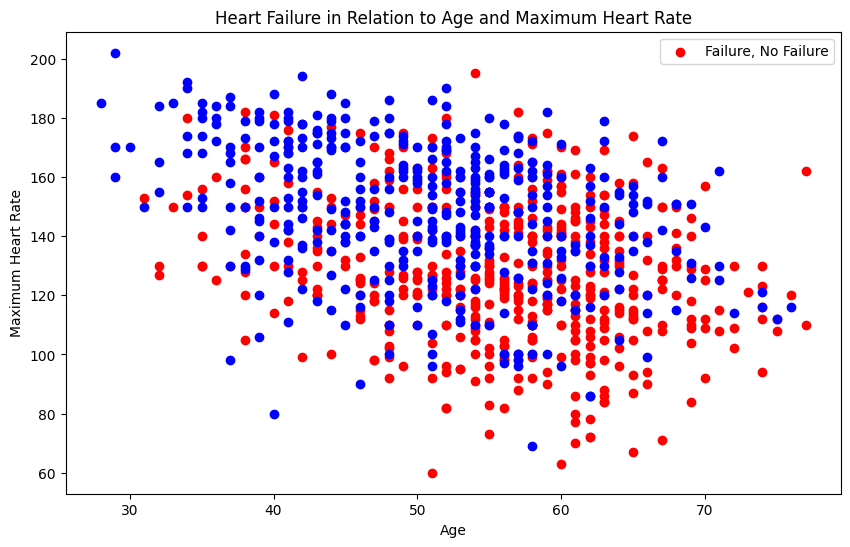

In [ ]:
pyplot.figure(figsize=(10, 6))

# Scatterplot containing positive examples
# Takes age column from data frame where heart failure is present
pyplot.scatter(dataframe.Age[dataframe.HeartDisease==1], dataframe.MaxHR[dataframe.HeartDisease==1], c="red")

# Scatterplot containing negative examples
# Takes age column from data frame where heart failure is not present
pyplot.scatter(dataframe.Age[dataframe.HeartDisease==0], dataframe.MaxHR[dataframe.HeartDisease==0], c="blue");

pyplot.title("Heart Failure in Relation to Age and Maximum Heart Rate")
pyplot.xlabel("Age")
pyplot.ylabel("Maximum Heart Rate")
pyplot.legend(["Failure, No Failure"]);

# Max heart rate tends to decline with age

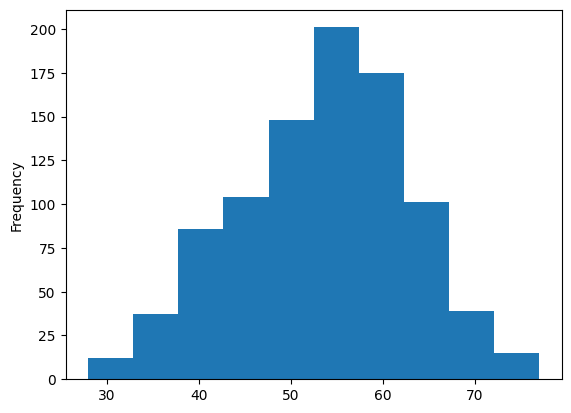

In [ ]:
# Check the distribution of the age column with a histogram
dataframe.Age.plot.hist();

In [ ]:
### Heart Failure Rate per Type of Chest Pain
pandas.crosstab(dataframe.ChestPainType, dataframe.HeartDisease)

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


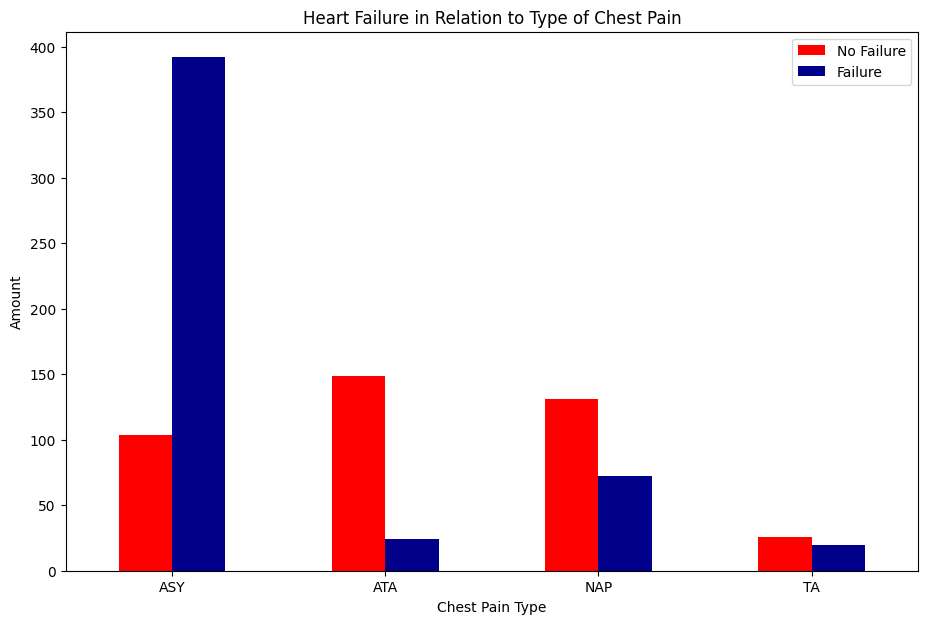

In [ ]:
# Display via graph
pandas.crosstab(dataframe.ChestPainType, dataframe.HeartDisease).plot(kind="bar", figsize=(11,7), color=["red", "darkblue"])

pyplot.title("Heart Failure in Relation to Type of Chest Pain")
pyplot.xlabel("Chest Pain Type")
pyplot.ylabel("Amount")
pyplot.legend(["No Failure", "Failure"])
pyplot.xticks(rotation=0);

## Modelling

In [ ]:
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Seperate data into X and Y
dataframe['Sex'] = numpy.where(dataframe['Sex'] == 'M', 1, 0)
dataframe['ExerciseAngina'] = numpy.where(dataframe['ExerciseAngina'] == 'Y', 1, 0)

y = dataframe.HeartDisease
X = dataframe.drop('HeartDisease', axis=1)
X = pandas.get_dummies(X)

In [ ]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,False,True,False,False,True,False,False,False,True,False


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
# Split the dataset into train and test sets
numpy.random.seed(42)

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,1,120,240,1,194,0,0.8,False,False,True,False,False,True,False,True,False,False
25,36,1,130,209,0,178,0,0.0,False,False,True,False,False,True,False,False,False,True
84,56,1,150,213,1,125,1,1.0,True,False,False,False,False,True,False,False,True,False
10,37,0,130,211,0,142,0,0.0,False,False,True,False,False,True,False,False,False,True
344,51,1,120,0,1,104,0,0.0,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,120,254,0,110,0,0.0,True,False,False,False,False,False,True,False,False,True
270,45,1,120,225,0,140,0,0.0,True,False,False,False,False,True,False,False,False,True
860,60,1,130,253,0,144,1,1.4,True,False,False,False,False,True,False,False,False,True
435,60,1,152,0,0,118,1,0.0,True,False,False,False,False,False,True,False,False,True


In [ ]:
y_train, len(y_train)

(795    0
 25     0
 84     1
 10     0
 344    1
       ..
 106    0
 270    0
 860    1
 435    0
 102    1
 Name: HeartDisease, Length: 734, dtype: int64,
 734)

Since data is now split into training and test sets, we can build a ML model.
The model will be trained aka find patterns on the training set.
Afterwards, we will test it (use patterns) on the test set.

Our testing will be done using Logistic Regression


In [ ]:
numpy.random.seed(42)

#dataframe['Sex'] = numpy.where(dataframe['Sex'] == 'M', 1, 0)
#dataframe['ExerciseAngina'] = numpy.where(dataframe['ExerciseAngina'] == 'Y', 1, 0)

#y = dataframe.HeartDisease
#X = dataframe.drop('HeartDisease', axis=1)
#X = pandas.get_dummoes(X)

logreg = LogisticRegression(solver='liblinear', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

## Hyperparameter Tuning


In [ ]:
# Creates hyperparameter grid for the LogisticRegression
logreg_grid = {"C": numpy.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

In [ ]:
# Tuning Logistic Regression
numpy.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_logreg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=logreg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
rs_logreg.score(X_test, y_test)

0.8586956521739131

## Further Tuning Hyperparameters using GridSearchCV

In [ ]:
# Hypperparameters for Logistic Regression
logreg_grid = {"C": numpy.logspace(-4, 4, 30),
              "solver": ["liblinear"]}

# Sets up the Logistic Regression grid hyperparameter search
logreg_grid_2 = GridSearchCV(LogisticRegression(),
                             param_grid=logreg_grid,
                             cv=5,
                             verbose=True)

# Fit grid hyperparameter search model
logreg_grid_2.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparams
logreg_grid_2.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [ ]:
# Evaluate grid search LogisticRegression model
logreg_grid_2.score(X_test, y_test)

0.8532608695652174

## Evaluating tuned machine learning classifier with ROC Curve and Confusion Matrix

In [ ]:
y_preds = logreg_grid_2.predict(X_test)

In [ ]:
y_preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

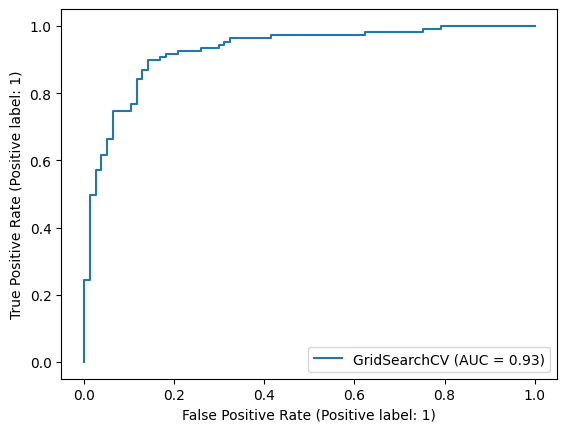

In [ ]:
# Plot ROC curve
RocCurveDisplay.from_estimator(logreg_grid_2, X_test, y_test)

In [ ]:
# Make Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[67 10]
 [17 90]]


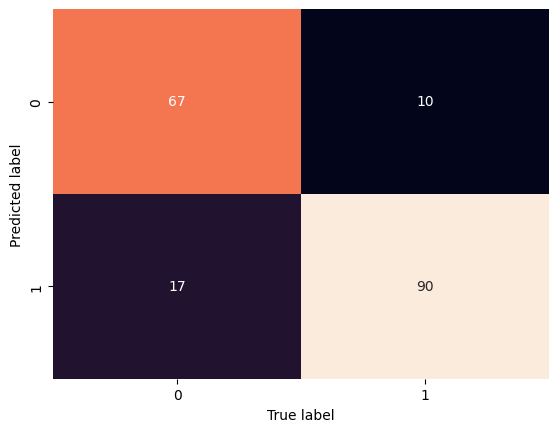

In [ ]:
def my_confusion_mat(y_test, y_preds):
    fig, ax = pyplot.subplots()
    ax = seaborn.heatmap(confusion_matrix(y_test, y_preds),
                        annot=True,
                        cbar=False)
    pyplot.xlabel("True label")
    pyplot.ylabel("Predicted label")

my_confusion_mat(y_test, y_preds)